### Centaurus A
[TeVCat Gamma-Ray Source Summary](http://tevcat.uchicago.edu/?mode=1;id=122)</br>

[NASA/IPAC Extragalactic Database](https://ned.ipac.caltech.edu/byname?objname=Centaurus+A&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1)

In [ ]:
# from feupy.scripts.ipynb_to_gallery import convert_ipynb_to_gallery 
# from .core import 

In [45]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt # A collection of command style functions

import numpy as np

from astropy import units as u
from astropy.units import  Quantity
from astropy.table import Table, Column
from astropy.coordinates import Angle, SkyCoord

from gammapy.utils.scripts import make_path
from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel, EBLAbsorptionNormSpectralModel

from gammapy.modeling import Fit
from gammapy.datasets import Datasets, FluxPointsDataset


from feupy.utils.string_handling import name_to_txt
from feupy.utils.units import Jy_to_erg_by_cm2_s
from feupy.utils.table import write_tables_csv

from feupy.catalog import CATALOG_REGISTRY
from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI

from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts
from feupy.analysis.core import Analysis

from core import get_data_VizieR_byname

from feupy.analysis.config import AnalysisConfig
from feupy.analysis.core import Analysis
from feupy.utils.observation import get_obs_label
from feupy.cta.irfs import Irfs

import matplotlib.pyplot as plt

import numpy as np
import astropy.units as u

from astropy.coordinates import Angle, SkyCoord

from feupy.utils.string_handling import name_to_txt
from feupy.utils.io import mkdir_sub_directory
from feupy.utils.table import write_tables_fits, write_tables_csv
from feupy.utils.datasets import flux_points_dataset_from_table

from feupy.utils.geometry import (
    create_energy_axis, 
    create_pointing, 
    create_pointing_position, 
    create_region_geometry,
    define_on_region,
)

from feupy.analysis.config import AnalysisConfig
from feupy.analysis.core import Analysis
from feupy.utils.observation import get_obs_label
from feupy.cta.irfs import Irfs

from gammapy.maps import MapAxis

from gammapy.datasets import SpectrumDataset, SpectrumDatasetOnOff, Datasets
from gammapy.makers import SpectrumDatasetMaker, SafeMaskMaker
from gammapy.estimators import FluxPoints, SensitivityEstimator
from gammapy.maps.axes import UNIT_STRING_FORMAT

from gammapy.data import Observation

from core import irfs_label_txt, plot_sensitivity_from_table

In [47]:
from gammapy.estimators import FluxPoints


In [54]:
source_name = 'Cen A'
redshift = 0.001825 
ebl_model_name = 'dominguez'

position = SkyCoord.from_name(source_name)

In [50]:
name_file = name_to_txt(source_name)
outdir = f"./{name_file}"
outdir_path = make_path(outdir)
outdir_path.mkdir(parents=True, exist_ok=True)

datasets_path = make_path(f"{outdir_path}/datasets/")
datasets_path.mkdir(parents=True, exist_ok=True)

tables_path = make_path(f"/home/born-again/Documents/GitHub/radio_galaxies/{name_file}/tables/")
tables_path.mkdir(parents=True, exist_ok=True)

data_path = make_path(f"/home/born-again/Documents/GitHub/radio_galaxies//data/{name_file}")
data_path.mkdir(parents=True, exist_ok=True)

figures_path = make_path(f"/home/born-again/Documents/GitHub/radio_galaxies/figures/")
figures_path.mkdir(parents=True, exist_ok=True)

config = CounterpartsConfig()

config.general.outdir = outdir
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"

In [6]:
# catalog = CATALOG_REGISTRY.get_cls("gamma-cat")()
# source = catalog[source_name]
# print(source.info())

In [53]:
target = Target(
    name=source_name, 
    pos_ra=position.ra, 
    pos_dec=position.dec
)

radius_roi = 0.25 * u.Unit("deg")

roi = ROI(target=target, radius=radius_roi)

config.roi = roi.dict
config.roi.catalogs = "all"

analysis = Counterparts(config)
analysis.run()
analysis.df_sep

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


SourceCatalogGammaCat:
    name: gamma-cat
    description: An open catalog of gamma-ray sources
    sources: 162

SourceCatalogHGPS:
    name: hgps
    description: H.E.S.S. Galactic plane survey (HGPS) source catalog
    sources: 78

SourceCatalog2HWC:
    name: 2hwc
    description: 2HWC catalog from the HAWC observatory
    sources: 40

SourceCatalog3FGL:
    name: 3fgl
    description: LAT 4-year point source catalog
    sources: 3034

SourceCatalog4FGL:
    name: 4fgl
    description: LAT 8-year point source catalog
    sources: 6659

SourceCatalog2FHL:
    name: 2fhl
    description: LAT second high-energy source catalog
    sources: 360

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 1556

SourceCatalog3HWC:
    name: 3hwc
    description: 3HWC catalog from the HAWC observatory
    sources: 65

SourceCatalogExtraHAWC:
    name: extraHAWC
    description: extraHAWC catalog from the HAWC observatory
    sources: 8

SourceCatal

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,3FGL J1325.4-4301,201.366592,-43.030499,0.011441
1,4FGL J1325.5-4300,201.381302,-43.016499,0.012157
2,2FHL J1325.6-4301,201.423004,-43.026600,0.043016
3,3FHL J1325.5-4300,201.376862,-43.013069,0.010533


In [8]:
models = Models()
datasets = Datasets()

datasets.extend(analysis.datasets)
models.extend(datasets.models)

datasets.write(
    filename=f'{datasets_path}/datasets_HE.yaml', 
    filename_models=f'{datasets_path}/models_HE.yaml', 
    overwrite=True)


In [9]:
datasets_HE = Datasets.read(filename=f'{datasets_path}/datasets_HE.yaml', filename_models=f'{datasets_path}/models_HE.yaml')

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [10]:
xaxis_label = r'$\rm{E\ [MeV] }$'
xaxis_units = u.Unit('MeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

leg_place = dict(
#     bbox_to_anchor = (1, 0.5), # Set legend outside plot
#     ncol=1, 
    loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

4 unique markers generated


In [11]:
spectral_model = models[1].spectral_model
spatial_model = models[1].spatial_model

model_fit = SkyModel(
    spatial_model=spatial_model,
    spectral_model=spectral_model,
    name="model-fit",
)
models.append(model_fit)
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.5911e+00,,1.968e-02,nan,nan,False,False,
spectral,amplitude,1.0938e-11,MeV-1 s-1 cm-2,2.168e-13,nan,nan,False,True,
spectral,reference,7.7794e+02,MeV,0.000e+00,nan,nan,True,False,


In [12]:
datasets.models = model_fit
fitter = Fit()
result_fit = fitter.run(datasets=datasets)
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.6243e+00,,1.890e-02,nan,nan,False,False,
spectral,amplitude,1.0933e-11,MeV-1 s-1 cm-2,1.862e-13,nan,nan,False,True,
spectral,reference,7.7794e+02,MeV,0.000e+00,nan,nan,True,False,


In [13]:
energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

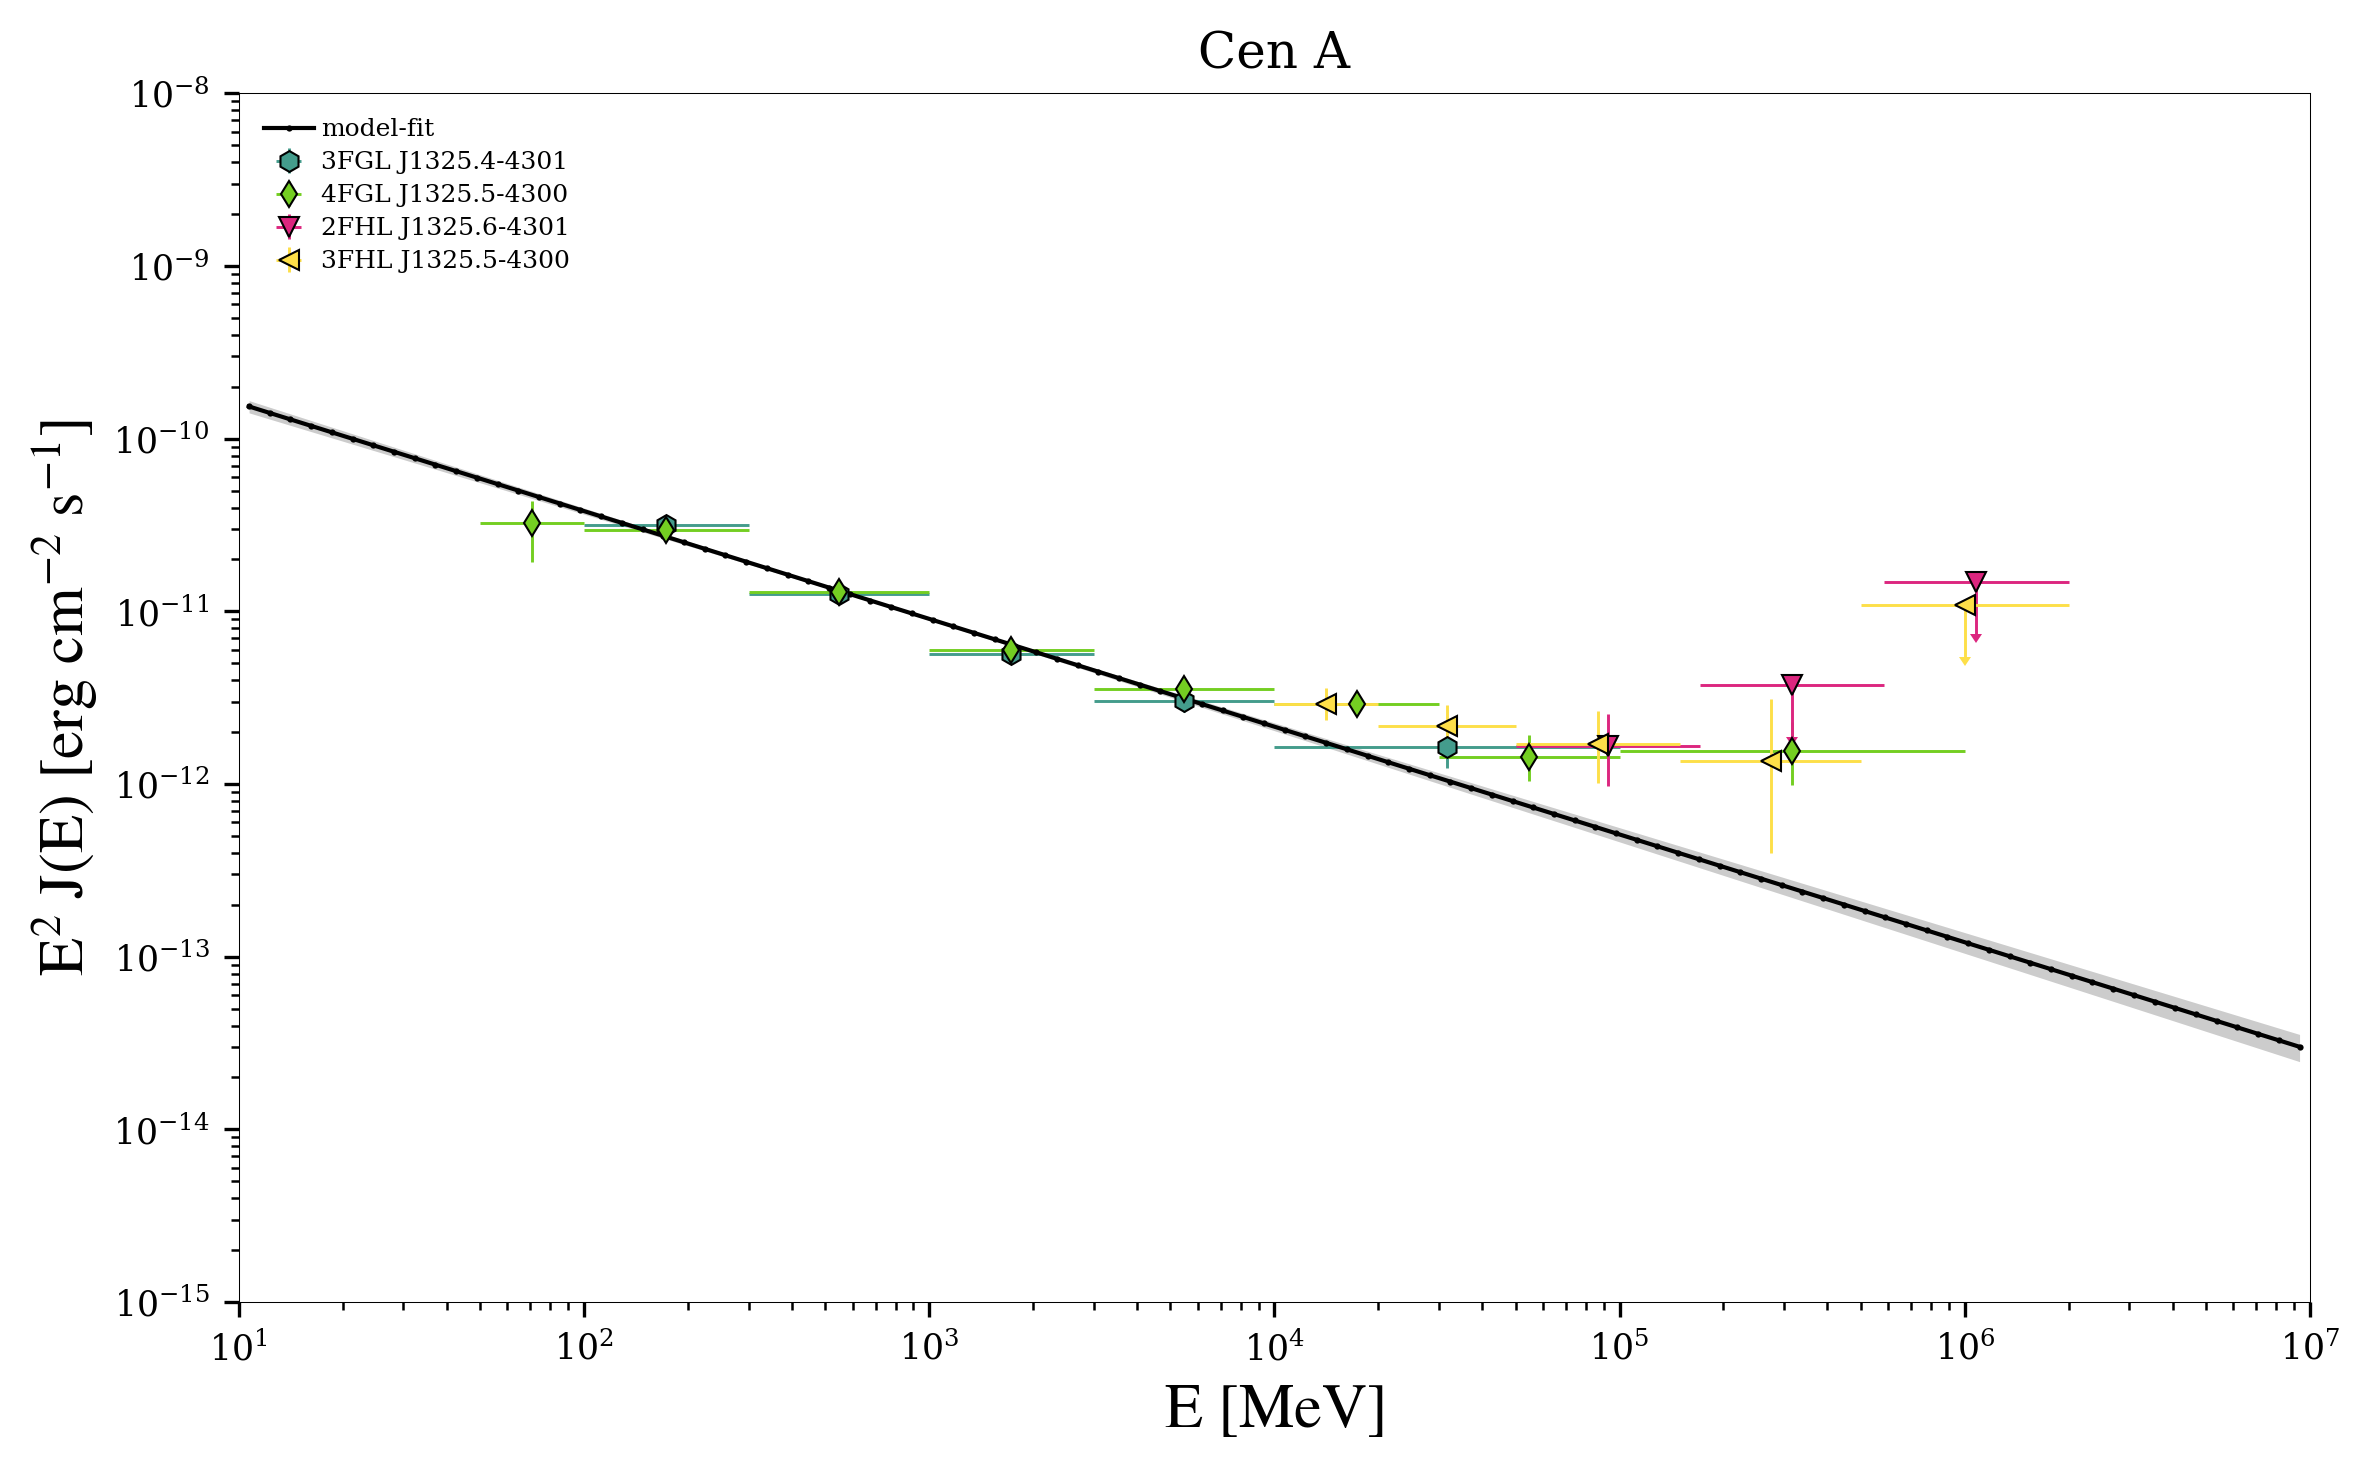

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(**leg_place)

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/SED_HE_{name_file}")
plt.show()


In [15]:
display(models['model-fit'].parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.6243e+00,,1.890e-02,nan,nan,False,False,
spectral,amplitude,1.0933e-11,MeV-1 s-1 cm-2,1.862e-13,nan,nan,False,True,
spectral,reference,7.7794e+02,MeV,0.000e+00,nan,nan,True,False,


In [16]:
datasets.models = models

In [17]:
# config.read(config.general.config_file)

In [18]:
datasets.write(filename=config.general.datasets_file, filename_models=config.general.models_file, overwrite=True)

In [19]:
file = f'{data_path}/table_photandseds.csv'
table = Table.read(file)
datasets_VizieR = get_data_VizieR_byname(table)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [20]:
datasets = Datasets(datasets_VizieR)
datasets.extend(datasets_HE)

In [21]:
xaxis_label = r'$\rm{E\ [TeV] }$'
xaxis_units = u.Unit('TeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e-22, 1e3] * u.TeV
ylim = [1e-16, 1e-6]

leg_place = dict(
#     bbox_to_anchor = (1, 0.5), # Set legend outside plot
#     ncol=1, 
    loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

78 unique markers generated


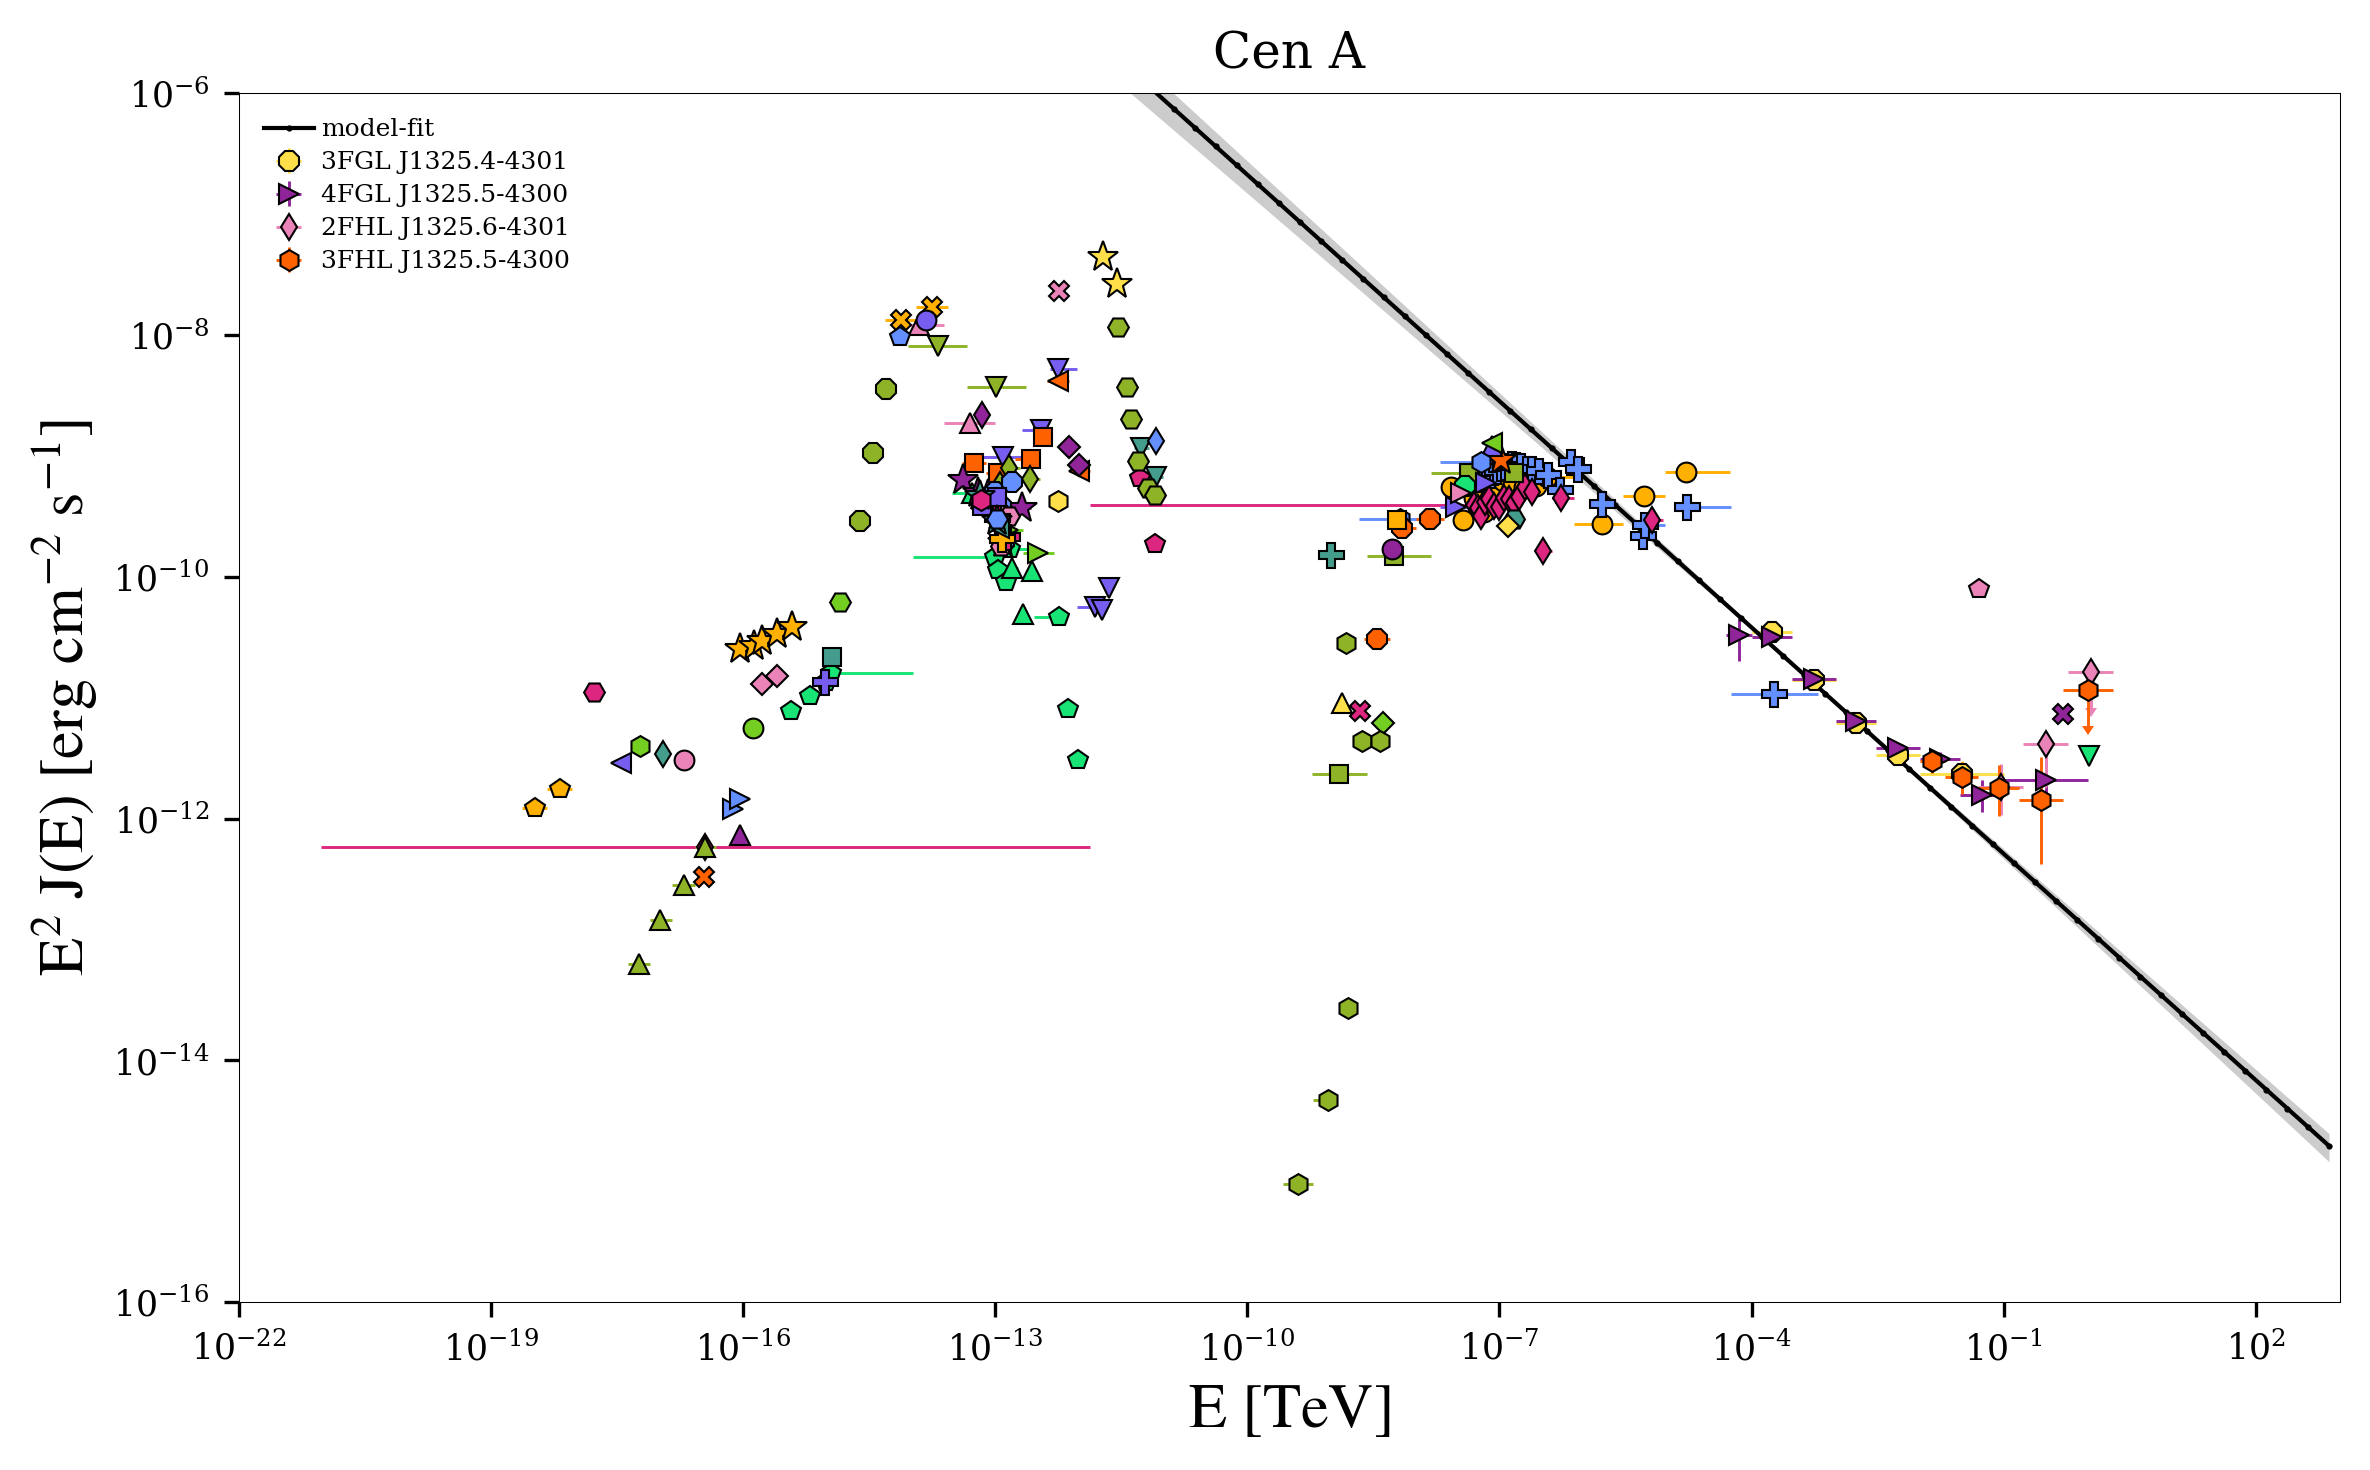

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 
    label=d.name
    if  label.find('FHL ') == -1:
        if label.find('FGL ') == -1:
            label = None
            
    d.data.plot(
        label=label, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)

ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(**leg_place)

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/flux_points_VizieR_{name_file}")
plt.show()

In [65]:
config =  AnalysisConfig()
config.general.outdir = outdir
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"
analysis = Analysis(config)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [66]:
pointing_angle = 0*u.deg
offset = 0.5*u.deg

on_region_radius = Angle("0.11 deg")

gamma_min = 10
n_sigma = 5 
bkg_syst_fraction = 0.10

selection = ["edisp", "background", "exposure"]

containment = 0.68

acceptance = 1
acceptance_off = 20

e_edges_min = 1.0e-01*u.TeV
e_edges_max = 3.2e+01*u.TeV
nbin_edges = 12

In [67]:
pointing_position = create_pointing_position(position, pointing_angle, offset)
pointing = create_pointing(pointing_position)
print(f"{pointing}\n")

on_region = define_on_region(center=position, radius=on_region_radius)
print(f"{on_region}\n")


config.datasets.geom.axes.energy.min = e_edges_min
config.datasets.geom.axes.energy.max = e_edges_max
config.datasets.geom.axes.energy.nbins = nbin_edges
config.datasets.geom.axes.energy.name = 'energy'
energy_settings = config.datasets.geom.axes.energy

config.datasets.geom.axes.energy_true.min =  3.2e-02*u.TeV
config.datasets.geom.axes.energy_true.max = 1.0e+02*u.TeV
config.datasets.geom.axes.energy_true.nbins = 15
config.datasets.geom.axes.energy_true.name = 'energy_true'
energy_true_settings = config.datasets.geom.axes.energy_true

energy_axis = create_energy_axis(
    energy_settings.min, 
    energy_settings.max, 
    energy_settings.nbins, 
    per_decade=True, 
    name=energy_settings.name
)

geom = create_region_geometry(on_region, axes=[energy_axis])
print(geom)
print(energy_axis)

energy_axis_true = create_energy_axis(
    energy_true_settings.min, 
    energy_true_settings.max, 
    energy_true_settings.nbins, 
    per_decade=True, 
    name=energy_true_settings.name
)


empty_dataset = SpectrumDataset.create(geom=geom, energy_axis_true=energy_axis_true, name='empty_dataset')
# analysis.datasets = Datasets(empty_dataset)
print(empty_dataset)

FixedPointingInfo:

mode:        PointingMode.POINTING
coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (201.36506338, -42.51911251)>

Region: CircleSkyRegion
center: <SkyCoord (ICRS): (ra, dec) in deg
    (201.36506338, -43.01911251)>
radius: 0.11 deg

RegionGeom

	region     : CircleSkyRegion
	axes       : ['lon', 'lat', 'energy']
	shape      : (1, 1, 31)
	ndim       : 3
	frame      : icrs
	center     : 201.4 deg, -43.0 deg

MapAxis

	name       : energy    
	unit       : 'TeV'     
	nbins      : 31        
	node type  : edges     
	edges min  : 1.0e-01 TeV
	edges max  : 3.2e+01 TeV
	interp     : log       

SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 0.00
  Total excess counts             : 0.00

  Predicted counts                : 0.00
  Predicted background counts     : 0.00
  Predicted excess counts         : nan

  Exposure min                    : 0.00e+00 m2 s

In [68]:
spectrum_maker = SpectrumDatasetMaker(selection=selection)
sensitivity_estimator = SensitivityEstimator(
    gamma_min=gamma_min, n_sigma=n_sigma, bkg_syst_fraction=bkg_syst_fraction
)
sensitivity_estimator1 = SensitivityEstimator(
    gamma_min=gamma_min, n_sigma=n_sigma, bkg_syst_fraction=bkg_syst_fraction
)

In [28]:
livetime = 200 * u.h

irfs_config =[
    ['South', 'South-SSTSubArray','South-MSTSubArray','North','North-MSTSubArray', 'North-LSTSubArray'], 
    ['AverageAz'], 
    ['20deg','40deg','60deg'], 
    ['50h']
]
irfs_opts, irfss, irfs_labels, locations = Irfs.get_irf_groups(irfs_config)

datasets = Datasets()
for i, (irfs_opt, irfs, irfs_label, location) in enumerate(zip(irfs_opts, irfss, irfs_labels, locations)):
    obs = Observation.create(
        pointing=pointing, irfs=irfs, livetime=livetime, location=location
    )
    print(obs)
    obs_label = get_obs_label(irfs_opt, offset, on_region_radius, livetime)
    print(obs_label)
    dataset = spectrum_maker.run(empty_dataset, obs)
    print(dataset)

    # correct exposure
    print('correct exposure')
    dataset.exposure *= containment
    print(dataset)

    # correct background estimation
    print('correct background estimation')
    on_radii = obs.psf.containment_radius(
        energy_true=energy_axis.center, 
        offset=offset, 
        fraction=containment
    )
    factor = (1 - np.cos(on_radii)) / (1 - np.cos(geom.region.radius))
    dataset.background *= factor.value.reshape((-1, 1, 1))
    print(dataset)

    print('create SpectrumDatasetOnOff')
    dataset_on_off = SpectrumDatasetOnOff.from_spectrum_dataset(
        dataset=dataset, acceptance=acceptance, acceptance_off=acceptance_off
    )
    print(dataset_on_off)

    sensitivity_table = sensitivity_estimator.run(dataset_on_off)
    sensitivity_table.meta['source'] = source_name
    sensitivity_table.meta["offset"] = offset.to_string()
    sensitivity_table.meta["on_region_radius"] = f'{on_region_radius.deg}deg'
    sensitivity_table.meta["livetime"] = livetime.to_string()    
    sensitivity_table.meta["site"] = irfs_opt[0]
    sensitivity_table.meta["azimuth-averaged "] = irfs_opt[1]
    sensitivity_table.meta["zenith-angle"] = u.Quantity(irfs_opt[2]).to_string()
    sensitivity_table.meta["obs_time"] = u.Quantity(irfs_opt[3]).to_string()
    sensitivity_table.meta['irfs_label'] = irfs_label
    sensitivity_table.meta['irfs_config'] = irfs_opt
    sensitivity_table["on_radii"] = on_radii
    sensitivity_table["on_radii"].format = '.3e'
    label_table = f'sens-{irfs_label_txt(irfs_opt)}'
    label_dataset = f'sens {obs_label}'
    sensitivity_dataset = flux_points_dataset_from_table(sensitivity_table, name=label_dataset)
    datasets.append(sensitivity_dataset)
    print(sensitivity_table)
    print(dataset_on_off)

    dataset_on_off1 = dataset_on_off.to_image()

    sensitivity_table1 = sensitivity_estimator1.run(dataset_on_off1)
    print(sensitivity_table1)

    # To get the integral flux, we convert to a `FluxPoints` object that does the conversion
    # internally
    flux_points = FluxPoints.from_table(
        sensitivity_table1, sed_type="e2dnde", reference_model=sensitivity_estimator1.spectrum
    )
    int_sens = np.squeeze(flux_points.flux.quantity)
    print(
        f"Integral sensitivity in {livetime:.2f} above {e_edges_min:.2e} "
        f"is {int_sens:.2e}"
    )
    sensitivity_table.meta['int_sens'] = int_sens.to_string()    
    write_tables_csv(
        sensitivity_table, tables_path, f"{label_table}_{livetime.to_string().replace(' h', 'h')}")

Observation

	obs id            : 0 
 	tstart            : 51544.00
	tstop             : 51552.33
	duration          : 720000.00 s
	pointing (icrs)   : 201.4 deg, -42.5 deg

	deadtime fraction : 0.0%

S-Az-20deg-50h (0.11deg,0.5deg,200h)


Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:349: RuntimeWarning: Tolerance of -4.199000613880344e-08 reached.
  warnings.warn(msg, RuntimeWarning)
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 28697.29
  Total excess counts             : -28697.29

  Predicted counts                : 28697.29
  Predicted background counts     : 28697.29
  Predicted excess counts         : nan

  Exposure min                    : 1.59e+09 m2 s
  Exposure max                    : 2.20e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 28697.29
  Total excess counts             : -28697.29

  Predicted counts                : 286

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 31514.46
  Total excess counts             : -31514.46

  Predicted counts                : 31514.46
  Predicted background counts     : 31514.46
  Predicted excess counts         : nan

  Exposure min                    : 4.68e+07 m2 s
  Exposure max                    : 2.80e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 31514.46
  Total excess counts             : -31514.46

  Predicted counts                : 315

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 7811.64
  Total excess counts             : -7811.64

  Predicted counts                : 7811.64
  Predicted background counts     : 7811.64
  Predicted excess counts         : nan

  Exposure min                    : 9.19e+06 m2 s
  Exposure max                    : 2.82e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 7811.64
  Total excess counts             : -7811.64

  Predicted counts                : 7811.64
 

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/stats/fit_statistics.py:189: RuntimeWarning: invalid value encountered in add
  stat = 2 * (term1 + term2 + term3)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 1048.43
  Total excess counts             : -1048.43

  Predicted counts                : 1048.43
  Predicted background counts     : 1048.43
  Predicted excess counts         : nan

  Exposure min                    : 3.88e+07 m2 s
  Exposure max                    : 1.87e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 1048.43
  Total excess counts             : -1048.43

  Predicted counts                : 1048.43
 

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/stats/fit_statistics.py:189: RuntimeWarning: invalid value encountered in add
  stat = 2 * (term1 + term2 + term3)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


 energy   e_ref    e_min    e_max   ...  background  criterion    on_radii
  TeV      TeV      TeV      TeV    ...                             deg   
-------- -------- -------- -------- ... ----------- ------------ ---------
 0.10975  0.10975      0.1 0.120451 ...           0        gamma 2.500e-04
0.132196 0.132196 0.120451 0.145085 ...           0        gamma 2.500e-04
0.159231 0.159231 0.145085 0.174757 ...           0        gamma 2.500e-04
0.191796 0.191796 0.174757 0.210497 ...           0        gamma 2.500e-04
0.231021 0.231021 0.210497 0.253546 ...           0        gamma 2.500e-04
0.278267 0.278267 0.253546 0.305399 ... 1.27283e-18 significance 6.598e-01
     ...      ...      ...      ... ...         ...          ...       ...
 9.54721  9.54721  8.69903  10.4781 ...     1.55918 significance 4.325e-02
 11.4997  11.4997  10.4781   12.621 ...     1.05073        gamma 4.125e-02
 13.8516  13.8516   12.621  15.2021 ...    0.748747        gamma 4.025e-02
 16.6844  16.6844  15.202

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/stats/fit_statistics.py:189: RuntimeWarning: invalid value encountered in add
  stat = 2 * (term1 + term2 + term3)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 921.28
  Total excess counts             : -921.28

  Predicted counts                : 921.28
  Predicted background counts     : 921.28
  Predicted excess counts         : nan

  Exposure min                    : 3.24e+07 m2 s
  Exposure max                    : 2.81e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 921.28
  Total excess counts             : -921.28

  Predicted counts                : 921.28
  Predic

Table column name energy will be deprecated by e_ref since v1.2


 energy  e_ref  e_min e_max     e2dnde     excess background  criterion  
  TeV     TeV    TeV   TeV  erg / (s cm2)                                
------- ------- ----- ----- ------------- ------- ---------- ------------
1.78885 1.78885   0.1    32   7.53939e-14 144.957    751.222 significance
Integral sensitivity in 200.00 h above 1.00e-01 TeV is 4.69e-13 1 / (s cm2)
Observation

	obs id            : 0 
 	tstart            : 51544.00
	tstop             : 51552.33
	duration          : 720000.00 s
	pointing (icrs)   : 201.4 deg, -42.5 deg

	deadtime fraction : 0.0%

S-MST-Az-20deg-50h (0.11deg,0.5deg,200h)


Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 29679.74
  Total excess counts             : -29679.74

  Predicted counts                : 29679.74
  Predicted background counts     : 29679.74
  Predicted excess counts         : nan

  Exposure min                    : 1.71e+09 m2 s
  Exposure max                    : 8.72e+11 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 29679.74
  Total excess counts             : -29679.74

  Predicted counts                : 296

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 31286.95
  Total excess counts             : -31286.95

  Predicted counts                : 31286.95
  Predicted background counts     : 31286.95
  Predicted excess counts         : nan

  Exposure min                    : 6.08e+07 m2 s
  Exposure max                    : 1.26e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 31286.95
  Total excess counts             : -31286.95

  Predicted counts                : 312

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 8233.23
  Total excess counts             : -8233.23

  Predicted counts                : 8233.23
  Predicted background counts     : 8233.23
  Predicted excess counts         : nan

  Exposure min                    : 9.19e+06 m2 s
  Exposure max                    : 1.38e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 8233.23
  Total excess counts             : -8233.23

  Predicted counts                : 8233.23
 

Table column name energy will be deprecated by e_ref since v1.2


 energy  e_ref  e_min e_max     e2dnde     excess background criterion
  TeV     TeV    TeV   TeV  erg / (s cm2)                             
------- ------- ----- ----- ------------- ------- ---------- ---------
1.78885 1.78885   0.1    32   3.09179e-13 1691.57    16915.7       bkg
Integral sensitivity in 200.00 h above 1.00e-01 TeV is 1.92e-12 1 / (s cm2)
Observation

	obs id            : 0 
 	tstart            : 51544.00
	tstop             : 51552.33
	duration          : 720000.00 s
	pointing (icrs)   : 201.4 deg, -42.5 deg

	deadtime fraction : 0.0%

N-Az-20deg-50h (0.11deg,0.5deg,200h)


Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 18296.59
  Total excess counts             : -18296.59

  Predicted counts                : 18296.59
  Predicted background counts     : 18296.59
  Predicted excess counts         : nan

  Exposure min                    : 1.38e+10 m2 s
  Exposure max                    : 7.10e+11 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 18296.59
  Total excess counts             : -18296.59

  Predicted counts                : 182

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 26338.98
  Total excess counts             : -26338.98

  Predicted counts                : 26338.98
  Predicted background counts     : 26338.98
  Predicted excess counts         : nan

  Exposure min                    : 1.08e+10 m2 s
  Exposure max                    : 1.08e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 26338.98
  Total excess counts             : -26338.98

  Predicted counts                : 263

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:349: RuntimeWarning: Tolerance of 2.6332372726756148e-08 reached.
  warnings.warn(msg, RuntimeWarning)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 59465.43
  Total excess counts             : -59465.43

  Predicted counts                : 59465.43
  Predicted background counts     : 59465.43
  Predicted excess counts         : nan

  Exposure min                    : 2.47e+07 m2 s
  Exposure max                    : 1.26e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 59465.43
  Total excess counts             : -59465.43

  Predicted counts                : 594

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 20613.31
  Total excess counts             : -20613.31

  Predicted counts                : 20613.31
  Predicted background counts     : 20613.31
  Predicted excess counts         : nan

  Exposure min                    : 7.18e+08 m2 s
  Exposure max                    : 6.95e+11 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 20613.31
  Total excess counts             : -20613.31

  Predicted counts                : 206

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 21805.31
  Total excess counts             : -21805.31

  Predicted counts                : 21805.31
  Predicted background counts     : 21805.31
  Predicted excess counts         : nan

  Exposure min                    : 3.69e+07 m2 s
  Exposure max                    : 1.08e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 21805.31
  Total excess counts             : -21805.31

  Predicted counts                : 218

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 6865.49
  Total excess counts             : -6865.49

  Predicted counts                : 6865.49
  Predicted background counts     : 6865.49
  Predicted excess counts         : nan

  Exposure min                    : 5.15e+06 m2 s
  Exposure max                    : 1.22e+12 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 6865.49
  Total excess counts             : -6865.49

  Predicted counts                : 6865.49
 

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 14381.92
  Total excess counts             : -14381.92

  Predicted counts                : 14381.92
  Predicted background counts     : 14381.92
  Predicted excess counts         : nan

  Exposure min                    : 1.28e+10 m2 s
  Exposure max                    : 1.86e+11 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 14381.92
  Total excess counts             : -14381.92

  Predicted counts                : 143

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 21562.62
  Total excess counts             : -21562.62

  Predicted counts                : 21562.62
  Predicted background counts     : 21562.62
  Predicted excess counts         : nan

  Exposure min                    : 1.08e+10 m2 s
  Exposure max                    : 3.16e+11 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 21562.62
  Total excess counts             : -21562.62

  Predicted counts                : 215

Table column name energy will be deprecated by e_ref since v1.2
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
Table column name energy will be deprecated by e_ref since v1.2


SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 54490.07
  Total excess counts             : -54490.07

  Predicted counts                : 54490.07
  Predicted background counts     : 54490.07
  Predicted excess counts         : nan

  Exposure min                    : 3.16e+07 m2 s
  Exposure max                    : 7.03e+11 m2 s

  Number of total bins            : 31 
  Number of fit bins              : 31 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


correct exposure
SpectrumDataset
---------------

  Name                            : empty_dataset 

  Total counts                    : 0 
  Total background counts         : 54490.07
  Total excess counts             : -54490.07

  Predicted counts                : 544

In [30]:
tables_south = [] 
tables_south_names = []

_irfs =[
    ['South'], 
    ['AverageAz'], 
    ['20deg','40deg','60deg'], 
    ['50h']
]
irfs_opts, irfss, irfs_labels, locations = Irfs.get_irf_groups(_irfs)
IRFS_OPTS_SOUTH = irfs_opts

for i, irfs_opt in enumerate(IRFS_OPTS_SOUTH):
    label_table = f'sens-{irfs_label_txt(irfs_opt)}'
    filename = f"{label_table}_{livetime.to_string().replace(' h', 'h')}.csv"
    table = Table.read(f'{tables_path}/{filename}', format='ascii')
    tables_south_names.append(table.meta['irfs_label'])
    tables_south.append(table)

markers_south = generate_marker_set(tables_south_names, 2.5)

tables_north = [] 
tables_north_names = []

_irfs =[
    ['North'], 
    ['AverageAz'], 
    ['20deg','40deg','60deg'], 
    ['50h']
]
irfs_opts, irfss, irfs_labels, locations = Irfs.get_irf_groups(_irfs)
IRFS_OPTS_NORTH = irfs_opts

for i, irfs_opt in enumerate(IRFS_OPTS_NORTH):
    label_table = f'sens-{irfs_label_txt(irfs_opt)}'
    filename = f"{label_table}_{livetime.to_string().replace(' h', 'h')}.csv"
    table = Table.read(f'{tables_path}/{filename}', format='ascii')
    tables_north_names.append(table.meta['irfs_label'])
    tables_north.append(table)

markers_north = generate_marker_set(tables_north_names, 2.5)

linestyle = ['solid', (0, (5, 1)), (0, (3, 5, 1, 5))]


3 unique markers generated
3 unique markers generated


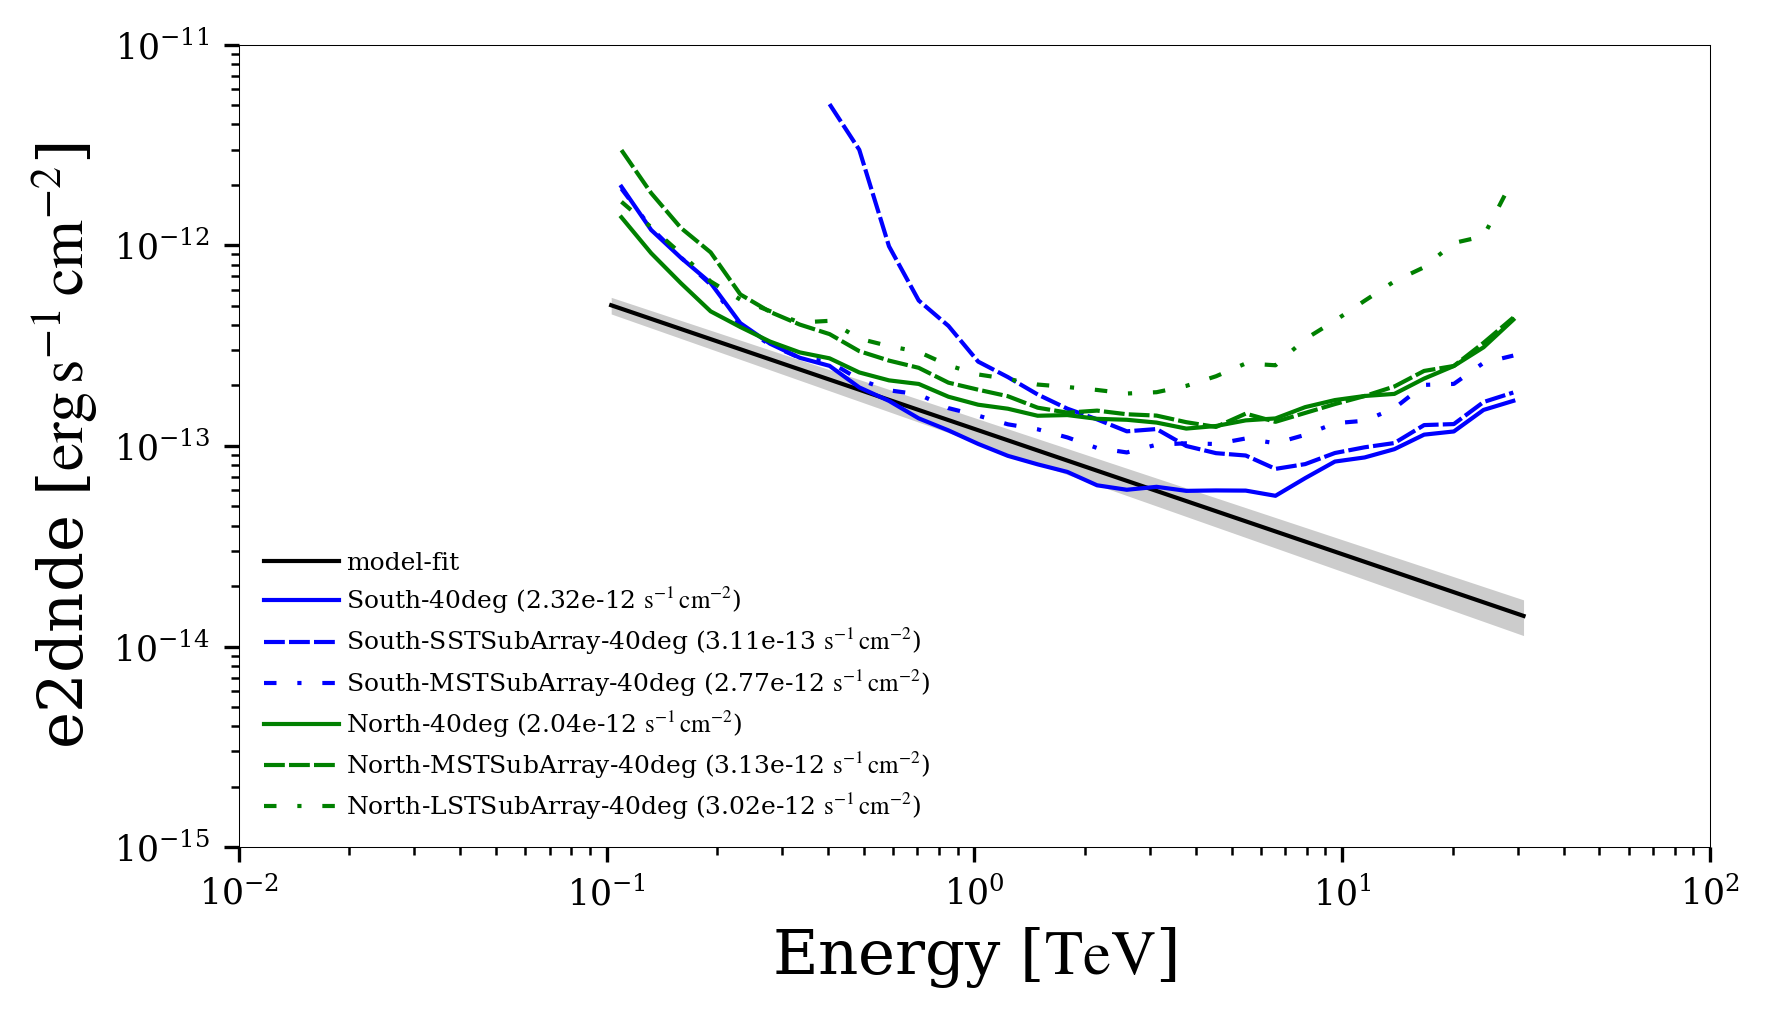

In [43]:
energy_bounds = [e_edges_min, e_edges_max]
ylim = [1e-16, 1e-6]

fig, ax = plt.subplots()
ax.set_prop_cycle(color=['blue', 'blue', 'blue'], linestyle=linestyle)

kwargs = {'ax': ax,
         'sed_type': 'e2dnde'}

for index, (table, label) in enumerate(zip(tables_south, tables_south_names)):
    int_sens = u.Quantity(table.meta['int_sens'])
    unit = int_sens.unit.to_string(UNIT_STRING_FORMAT)
    label = label.replace('-50h)', '').replace(' (', '-')
    label = f'{label} ({int_sens.value:.2e} {unit})'
    ax = plot_sensitivity_from_table(table, wich='e2dnde',  ax=ax, label=label)

ax.set_prop_cycle(color=['green', 'green', 'green'], linestyle=linestyle)
for index, (table, label) in enumerate(zip(tables_north, tables_north_names)):
    int_sens = u.Quantity(table.meta['int_sens'])
    unit = int_sens.unit.to_string(UNIT_STRING_FORMAT)
    label = label.replace('-50h)', '').replace(' (', '-')
    label = f'{label} ({int_sens.value:.2e} {unit})'
    ax = plot_sensitivity_from_table(table,wich='e2dnde', ax=ax, label=label)
    
model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)

ax.legend(loc="best", scatterpoints=1, handlelength = 3, fontsize=6)

plt.savefig(fname = f"/home/born-again/Documents/GitHub/radio_galaxies/figures/{name_file}_sites.png")

3 unique markers generated
3 unique markers generated


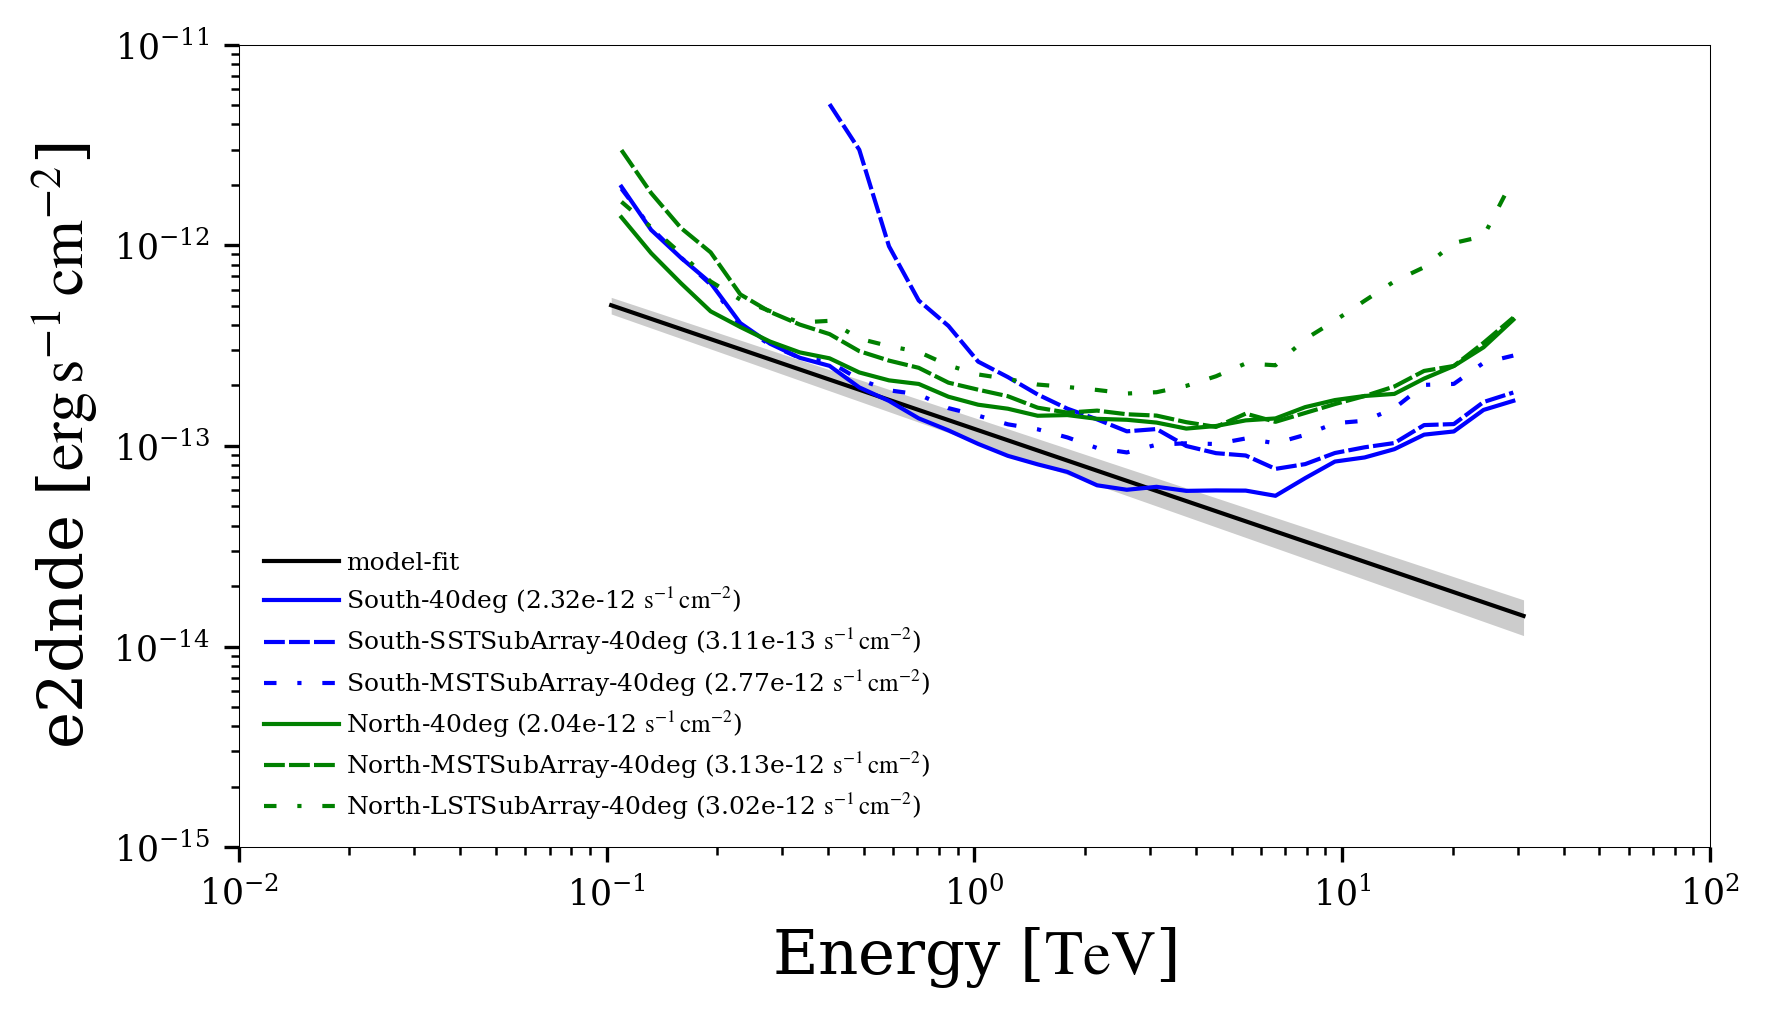

In [44]:
tables_south = [] 
tables_south_names = []

_irfs =[
    ['South', 'South-SSTSubArray', 'South-MSTSubArray'], 
    ['AverageAz'], 
    ['40deg'], 
    ['50h']
]
irfs_opts, irfss, irfs_labels, locations = Irfs.get_irf_groups(_irfs)
IRFS_OPTS_SOUTH = irfs_opts

for i, irfs_opt in enumerate(IRFS_OPTS_SOUTH):
    label_table = f'sens-{irfs_label_txt(irfs_opt)}'
    filename = f"{label_table}_{livetime.to_string().replace(' h', 'h')}.csv"
    table = Table.read(f'{tables_path}/{filename}', format='ascii')
    tables_south_names.append(table.meta['irfs_label'])
    tables_south.append(table)

markers_south = generate_marker_set(tables_south_names, 2.5)

tables_north = [] 
tables_north_names = []

_irfs =[
    ['North', 'North-MSTSubArray', 'North-LSTSubArray'], 
    ['AverageAz'], 
    ['40deg'], 
    ['50h']
]
irfs_opts, irfss, irfs_labels, locations = Irfs.get_irf_groups(_irfs)
IRFS_OPTS_NORTH = irfs_opts

for i, irfs_opt in enumerate(IRFS_OPTS_NORTH):
    label_table = f'sens-{irfs_label_txt(irfs_opt)}'
    filename = f"{label_table}_{livetime.to_string().replace(' h', 'h')}.csv"
    table = Table.read(f'{tables_path}/{filename}', format='ascii')
    tables_north_names.append(table.meta['irfs_label'])
    tables_north.append(table)

markers_north = generate_marker_set(tables_north_names, 2.5)

fig, ax = plt.subplots()

kwargs = {'ax': ax,
         'sed_type': 'e2dnde'}
ax.set_prop_cycle(color=['blue', 'blue', 'blue'], linestyle=linestyle)
for index, (table, label) in enumerate(zip(tables_south, tables_south_names)):
    int_sens = u.Quantity(table.meta['int_sens'])
    unit = int_sens.unit.to_string(UNIT_STRING_FORMAT)
    label = label.replace('-50h)', '').replace(' (', '-')
    label = f'{label} ({int_sens.value:.2e} {unit})'
    ax = plot_sensitivity_from_table(table, wich='e2dnde',  ax=ax, label=label)

ax.set_prop_cycle(color=['green', 'green', 'green'], linestyle=linestyle)
for index, (table, label) in enumerate(zip(tables_north, tables_north_names)):
    int_sens = u.Quantity(table.meta['int_sens'])
    unit = int_sens.unit.to_string(UNIT_STRING_FORMAT)
    label = label.replace('-50h)', '').replace(' (', '-')
    label = f'{label} ({int_sens.value:.2e} {unit})'
    
    ax = plot_sensitivity_from_table(table,wich='e2dnde', ax=ax, label=label)

model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)

ax.legend(loc="best", scatterpoints=1, handlelength = 3, fontsize=6)
plt.savefig(fname = f"/home/born-again/Documents/GitHub/radio_galaxies/figures/{name_file}_subarrays.png")


In [58]:
model_intrinsic = model_fit.spectral_model.copy()
print(model_intrinsic)

PowerLawSpectralModel

  type      name     value    ... frozen is_norm        link       
-------- --------- ---------- ... ------ ------- ------------------
spectral     index 2.6243e+00 ...  False   False     index@4sBmn-pv
spectral amplitude 1.0933e-11 ...  False    True amplitude@T3ylBFma
spectral reference 7.7794e+02 ...   True   False reference@GiDhR89p


In [61]:
redshift = 0.116
ebl = EBLAbsorptionNormSpectralModel.read_builtin("dominguez", redshift=redshift)

spectral_model = ebl * model_intrinsic
spatial_model = model_fit.spatial_model
model_simu = SkyModel(spectral_model=spectral_model, 
                      spatial_model=spatial_model,
                      name="model-simu")
display(model_simu.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str10,float64,str14,float64,float64,float64,bool,bool,str18
spectral,alpha_norm,1.0000e+00,,0.000e+00,nan,nan,True,False,
spectral,redshift,1.1600e-01,,0.000e+00,nan,nan,True,False,
spectral,index,2.6243e+00,,1.890e-02,nan,nan,False,False,index@4sBmn-pv
spectral,amplitude,1.0933e-11,MeV-1 s-1 cm-2,1.862e-13,nan,nan,False,True,amplitude@T3ylBFma
spectral,reference,7.7794e+02,MeV,0.000e+00,nan,nan,True,False,reference@GiDhR89p


In [62]:
target = Target(
    name=source_name, 
    pos_ra=position.ra, 
    pos_dec=position.dec,
    spectral_model=model_intrinsic,
    redshift = redshift,
    ebl_model_name= "dominguez",
)

print(target)


*** Basic info ***

Source name : Cen A

*** Position info ***

RA: 201.365 deg
DEC: -43.019 deg

*** Spectral info ***

Spectrum type:  CompoundSpectralModel
alpha_norm: 1.0 +- 0 
redshift: 0.116 +- 0 
index: 2.62 +- 0.018901684446542638 
amplitude: 1.09e-11 +- 1.862400300420433e-13 MeV⁻¹ s⁻¹ cm⁻²
reference: 7.78e+02 +- 0.0 MeV



In [71]:
irfs_opt = ['North', 'AverageAz', '20deg', '50h']

n_obs = 10

config.flux_points.source = target.name
config.flux_points.energy.nbins = config.datasets.geom.axes.energy.nbins
config.flux_points.energy.max = config.datasets.geom.axes.energy.max 
config.flux_points.energy.min = config.datasets.geom.axes.energy.min 

analysis = Analysis(config)
observation = analysis.create_observation()
reference_dataset = analysis.create_reference_dataset()
spectrum_dataset = analysis.simulate_spectrum(observation, reference_dataset, model.copy(name='source'))
dataset_on_off = analysis.make_on_off(spectrum_dataset)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}
Creating an observation


TypeError: The value must be a valid Python or Numpy numeric type.

In [ ]:
!jupyter nbconvert counterparts.ipynb  --to notebook --output 'counterparts_{source_name}' --output-dir '.'

In [ ]:
convert_ipynb_to_gallery('counterparts.ipynb', output_file_name=f'{outdir}/counterparts_{source_name}')